Este conjunto de datos se puede utilizar para predecir la gravedad (benigna o maligna)
de una masa mamográfica a partir de los atributos BI-RADS y la edad de la paciente. Contiene una evaluación BI-RADS, la edad del paciente y tres atributos BI-RADS junto con la gravedad para 516 casos benignos y 445 masas malignas que se han identificado en mamografías digitales de campo completo recogidos en el Instituto de Radiología de la Universidad Erlangen-Nuremberg entre 2003 y 2006.
Cada instancia tiene una evaluación BI-RADS asociada que varía de 1 (definitivamente benigna)
a 5 (altamente sugestivo de malignidad) asignado en un proceso de doble revisión por
médicos

### Ejercicio

- Generar un conjunto de entrenamiento y uno de prueba
- Entrenar el modelo
- Hacer predicciones sobre el conjunto de prueba
- Evaluar el modelo

¿El modelo logra clasificar correctamente los casos de prueba?
¿Cómo afectaría en la realidad el error de este modelo?


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy

In [2]:
df = pd.read_csv("mammogram_dataset.csv")
df

,BI_RADS_assessment,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,-100000,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,-100000,1
...,...,...,...,...,...,...
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1


In [3]:
df["density"] = df["density"].replace([-100000], df.mode(axis=0)["density"])
df["BI_RADS_assessment"] = df["BI_RADS_assessment"].replace([-100000], df.mode(axis=0)["BI_RADS_assessment"])
df["age"] = df["age"].replace([-100000], df.mode(axis=0)["age"])
df["shape"] = df["shape"].replace([-100000], df.mode(axis=0)["shape"])
df["margin"] = df["margin"].replace([-100000], df.mode(axis=0)["margin"])
df["severity"] = df["severity"].replace([-100000], df.mode(axis=0)["severity"])

# Datos

In [4]:
data = df.values[:, 1:6]
data

array([[67,  3,  5,  3,  1],
       [43,  1,  1,  3,  1],
       [58,  4,  5,  3,  1],
       ...,
       [64,  4,  5,  3,  0],
       [66,  4,  5,  3,  1],
       [62,  3,  3,  3,  0]], dtype=int64)

# Etiquetas

In [5]:
labels = df.values[:, 0]
labels = list(labels)
new_list = []
for string in labels:
    string = str(string)
    new_string = string.replace("55", "5") # Elimino el 55 de la lista
    new_list.append(int(new_string))
labels = numpy.asarray(new_list)
labels

array([5, 4, 5, 4, 5, 4, 4, 5, 5, 5, 5, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 5,
       4, 5, 4, 5, 2, 5, 5, 5, 4, 5, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 4, 2, 5, 4, 5, 4, 4, 4, 4, 4, 5, 4, 5, 5, 5, 4, 3, 5, 4,
       4, 5, 4, 4, 4, 5, 5, 5, 5, 4, 5, 4, 5, 5, 4, 5, 3, 4, 5, 4, 5, 5,
       4, 5, 4, 4, 4, 5, 5, 5, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 3, 4, 5,
       4, 5, 5, 4, 4, 4, 4, 4, 5, 5, 5, 4, 4, 4, 5, 4, 4, 4, 4, 5, 5, 5,
       5, 4, 5, 5, 4, 5, 4, 5, 5, 4, 4, 4, 4, 5, 5, 4, 4, 4, 5, 5, 4, 4,
       3, 4, 5, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 5, 5, 4, 4, 4, 4, 4, 5,
       4, 4, 5, 5, 4, 5, 4, 4, 4, 5, 5, 4, 5, 5, 4, 5, 5, 4, 4, 5, 4, 5,
       4, 4, 4, 3, 4, 2, 4, 5, 4, 4, 4, 4, 4, 4, 2, 5, 5, 4, 4, 4, 5, 3,
       3, 4, 5, 5, 5, 4, 5, 2, 4, 4, 3, 5, 5, 4, 5, 5, 3, 4, 4, 4, 5, 4,
       4, 3, 5, 4, 4, 5, 4, 3, 4, 5, 4, 4, 5, 3, 5, 5, 5, 5, 5, 4, 4, 4,
       5, 4, 5, 3, 5, 5, 5, 5, 5, 2, 4, 5, 5, 4, 5, 4, 5, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 4, 5, 4, 4, 5, 4, 4, 4, 5, 5,

# Conjuntos de entrenamiento y pruebas

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=20)

# Entrenamiento

In [7]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

# Pruebas

In [8]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 4, 4, 0, 5, 4, 5, 0, 4, 0, 0, 4, 5, 0, 4, 0, 4, 4, 0, 0, 4, 0,
       4, 4, 0, 4, 4, 0, 0, 5, 4, 0, 0, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4,
       4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 5, 0, 0, 0, 0, 5, 0, 5, 5, 5, 0, 0,
       4, 4, 2, 4, 0, 2, 0, 0, 4, 4, 4, 0, 0, 4, 0, 4, 4, 0, 5, 0, 0, 5,
       4, 4, 4, 0, 4, 0, 0, 5, 4, 0, 4, 0, 4, 0, 4, 4, 2, 0, 5, 2, 4, 4,
       4, 0, 4, 0, 4, 0, 0, 4, 4, 0, 4, 0, 4, 5, 0, 5, 4, 4, 0, 4, 0, 4,
       0, 0, 5, 5, 4, 0, 5, 2, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 4, 4, 0,
       0, 4, 5, 4, 0, 5, 0, 5, 0, 4, 4, 0, 4, 4, 4, 0, 4, 4, 5, 4, 0, 5,
       4, 4, 0, 4, 4, 4, 0, 0, 5, 4, 0, 0, 0, 0, 5, 5, 4, 5, 4, 0, 4, 5,
       5, 0, 5, 5, 4, 4, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 5, 0,
       0, 5, 4, 0, 0, 4, 5, 4, 0, 0, 0, 0, 0, 4, 4, 0, 4, 4, 0, 0, 5, 4,
       0, 0, 5, 4, 0, 4, 0, 4, 0, 0, 4, 4, 0, 4, 5, 4, 4, 4, 4, 0, 5, 4,
       4, 0, 5, 0, 0, 4, 0, 5, 4, 4, 0, 0, 4, 4, 4, 0, 0, 4, 0, 4, 0, 4,
       4, 0, 0])

In [9]:
metrics.accuracy_score(y_pred, y_test)

0.46366782006920415

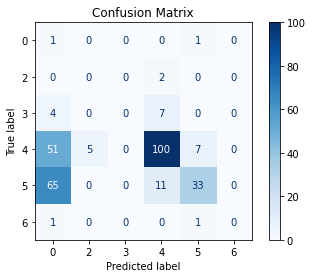

In [10]:
metrics.confusion_matrix(y_test, y_pred)
disp = metrics.plot_confusion_matrix(gnb, X_test, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()

# Conclusiones

El puntaje de las predicciones es demasiado bajo, el error producira predicciones erroneas en casos reales.